In [12]:
# for data cleaning
import numpy as np 
import pandas as pd 
# pd.set_option('display.max_columns', 60)
# pd.set_option('display.max_rows', 60)
from IPython.display import display, HTML

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

# for graphs
import seaborn as sns
sns.set_context(font_scale=2)

# ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# feature selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# loading dataset
trees = pd.read_csv("F:/Sem 3/535 Data Mining/FC EDA/covtype.csv")
print("The size of the dataset is: ", trees.shape)

The size of the dataset is:  (581012, 55)


In [157]:
display(HTML(trees.head(15).to_html()))

In [158]:
display(HTML(trees.tail(15).to_html()))

In [159]:
print(trees.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [160]:
# summary statistics
display(trees.describe())

Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       30.000000   
75%                          384.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    581012.000000  581012.000000   581012.000000   
mean                       2350.146611     212.146049      223.318716   
std                        1559.254870      26.769889       19.768697   
min                           0.000000       0.000000        0.000000   
25%                        1106.000000     198.000000      213.000000   
50%                        1997.000000     218.000000      226.000000   
75%                        3328.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count  581012.000000                       581012.000000     581012.000000   
mean      142.528263                         1980.291226          0.448865   
std        38.274529                         1324.195210          0.497379   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1024.000000          0.000000   
50%       143.000000                         1710.000000          0.000000   
75%       168.000000                         2550.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4     Soil_Type1  \
count     581012.000000     581012.000000     581012.000000  581012.000000   
mean           0.051434          0.436074          0.063627       0.005217   
std            0.220882          0.495897          0.244087       0.072039   
min            0.000000          0.000000          0.000000       0.000000   
25%            0.000000          0.000000          0.000000       0.000000   
50%            0.000000          0.000000          0.000000       0.000000   
75%            0.000000          1.000000          0.000000       0.000000   
max            1.000000          1.000000          1.000000       1.000000   

          Soil_Type2     Soil_Type3     Soil_Type4     Soil_Type5  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.012952       0.008301       0.021335       0.002749   
std         0.113066       0.090731       0.144499       0.052356   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type6     Soil_Type7     Soil_Type8     Soil_Type9  \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean        0.011316    

In [24]:
# Calculate the correlation matrix
correlation_matrix = trees.corr()

# Display the correlation matrix
print(correlation_matrix)


                                    Elevation    Aspect     Slope  \
Elevation                            1.000000  0.015735 -0.242697   
Aspect                               0.015735  1.000000  0.078728   
Slope                               -0.242697  0.078728  1.000000   
Horizontal_Distance_To_Hydrology     0.306229  0.017376 -0.010607   
Vertical_Distance_To_Hydrology       0.093306  0.070305  0.274976   
Horizontal_Distance_To_Roadways      0.365559  0.025121 -0.215914   
Hillshade_9am                        0.112179 -0.579273 -0.327199   
Hillshade_Noon                       0.205887  0.336103 -0.526911   
Hillshade_3pm                        0.059148  0.646944 -0.175854   
Horizontal_Distance_To_Fire_Points   0.148022 -0.109172 -0.185662   
Wilderness_Area1                     0.131838 -0.140123 -0.234576   
Wilderness_Area2                     0.238164  0.055988 -0.036253   
Wilderness_Area3                     0.066550  0.074904  0.125663   
Wilderness_Area4                  

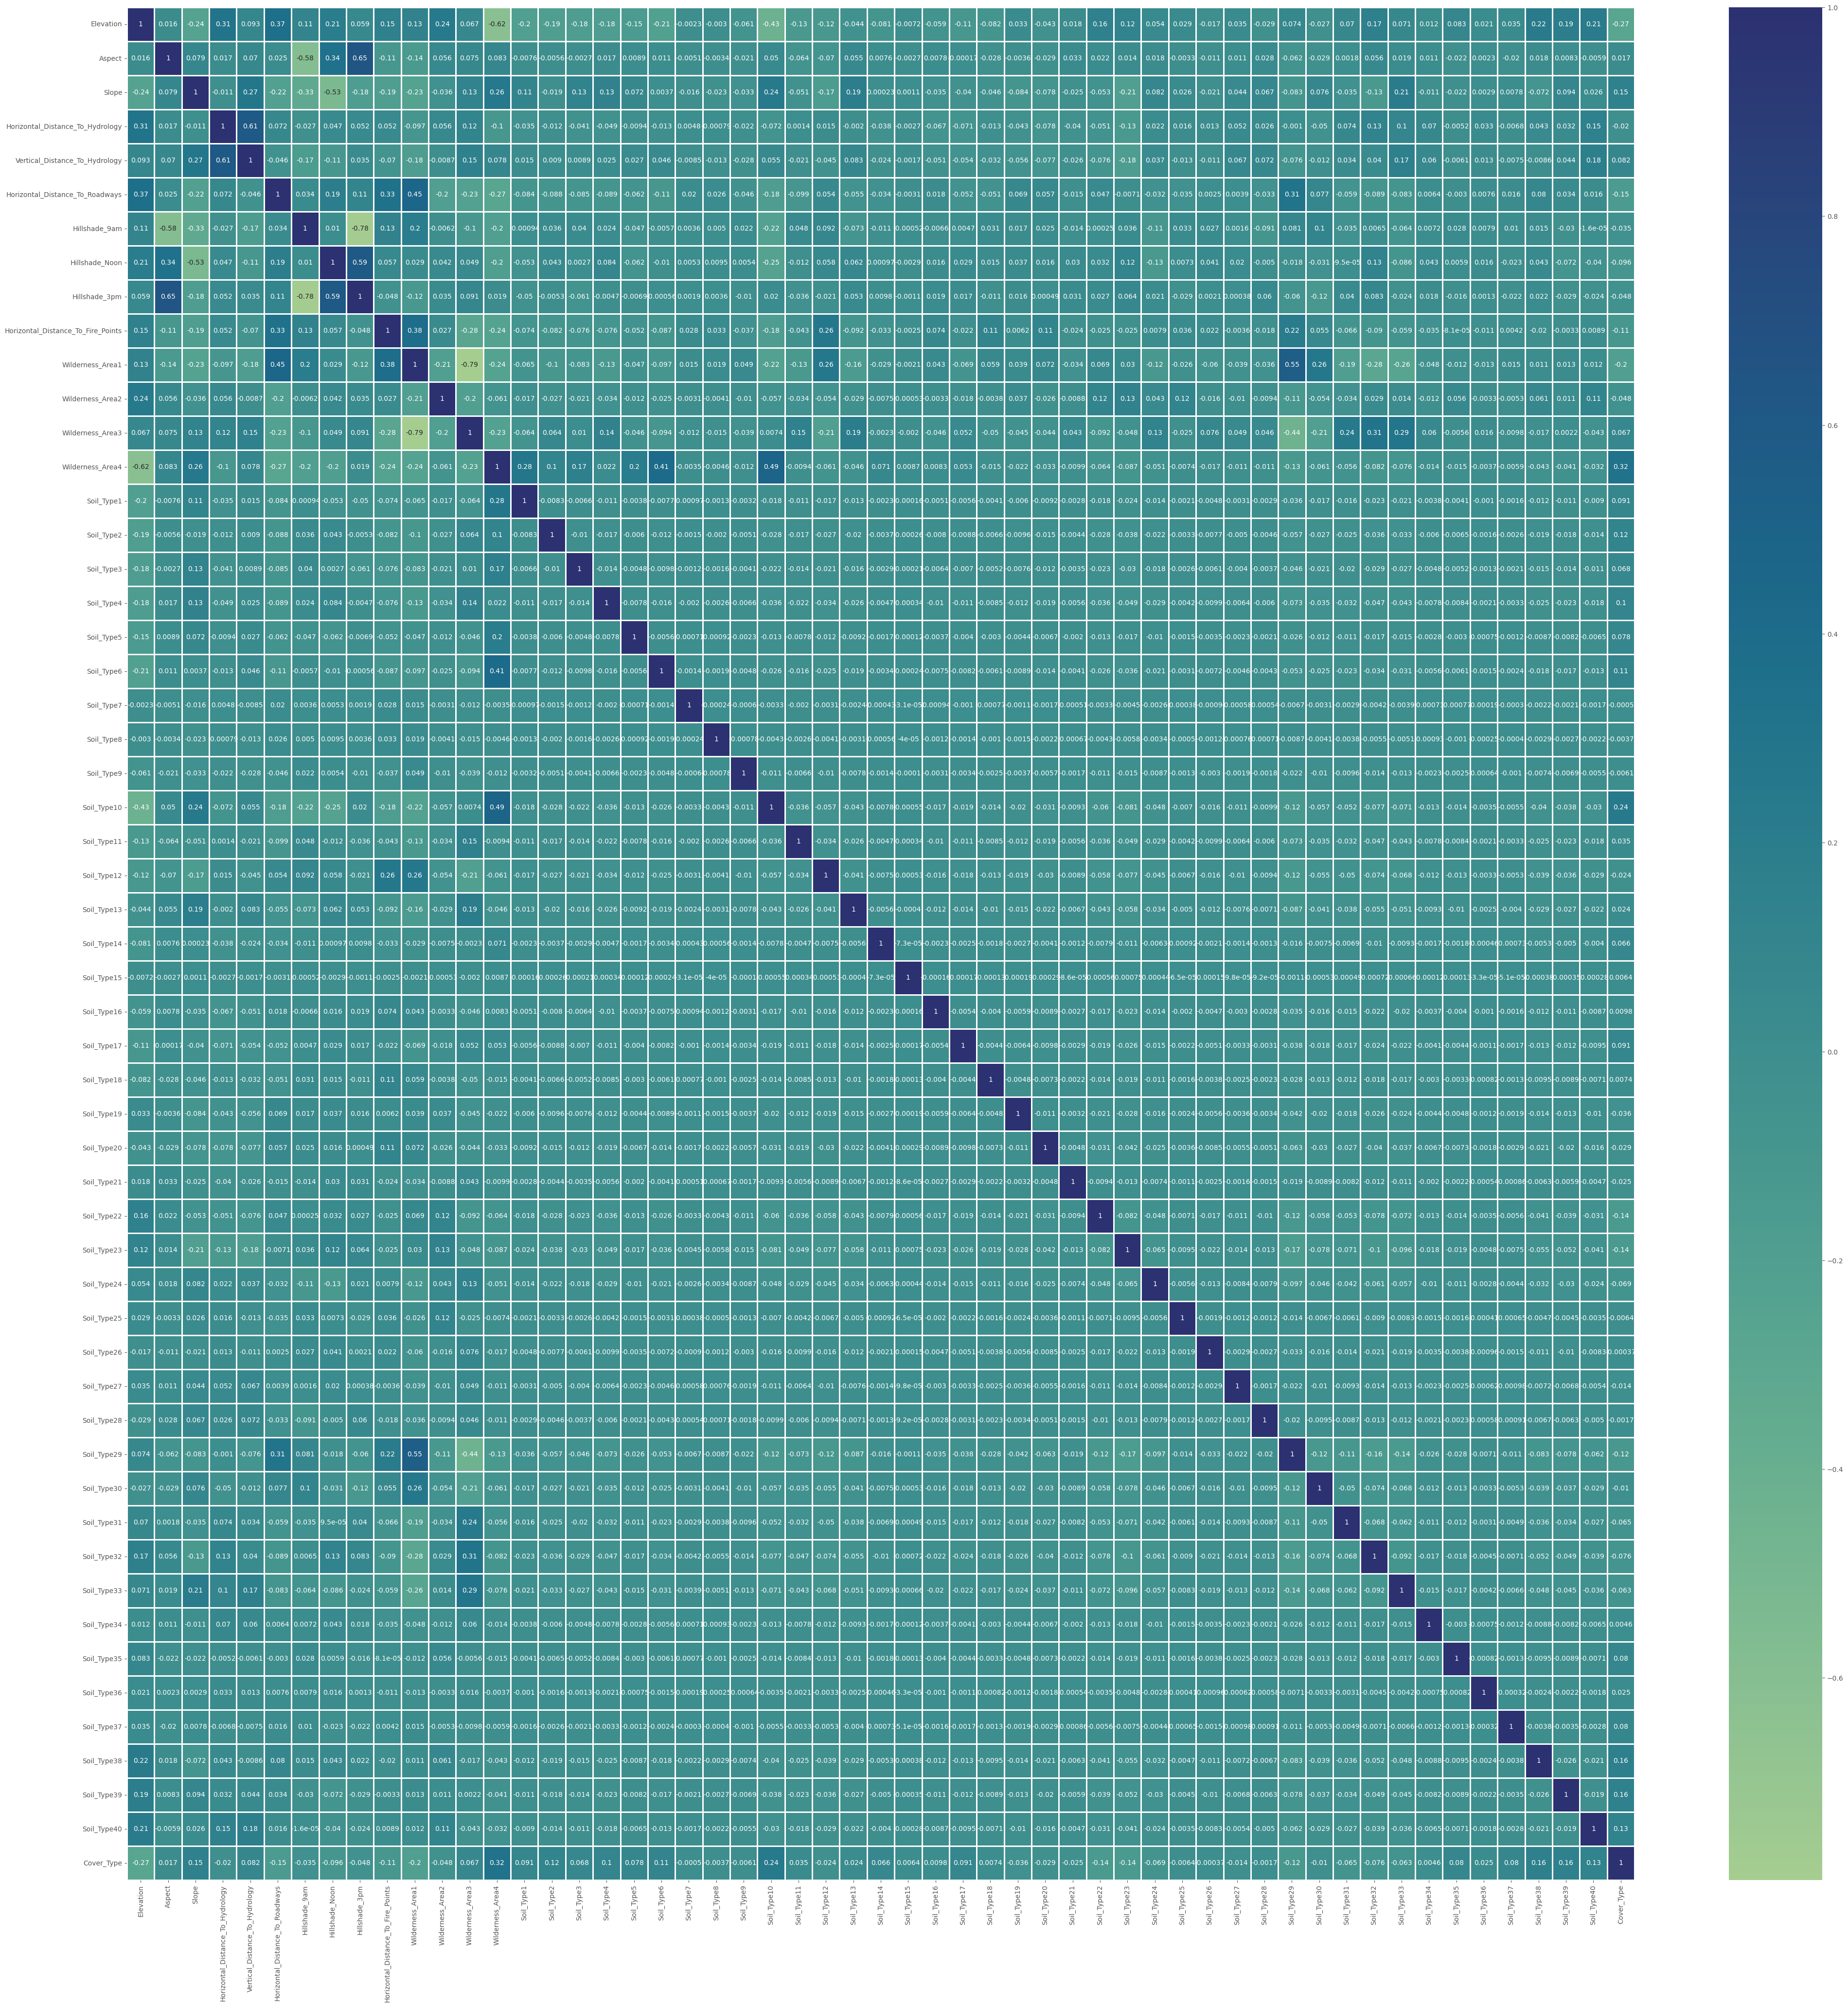

In [221]:
plt.figure(figsize=(50,50))
sns.heatmap(trees.corr(),cmap='crest',linecolor='white',linewidths=1,annot=True, xticklabels = True, yticklabels= True)
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/heatmap.png'
plt.savefig(save_path)


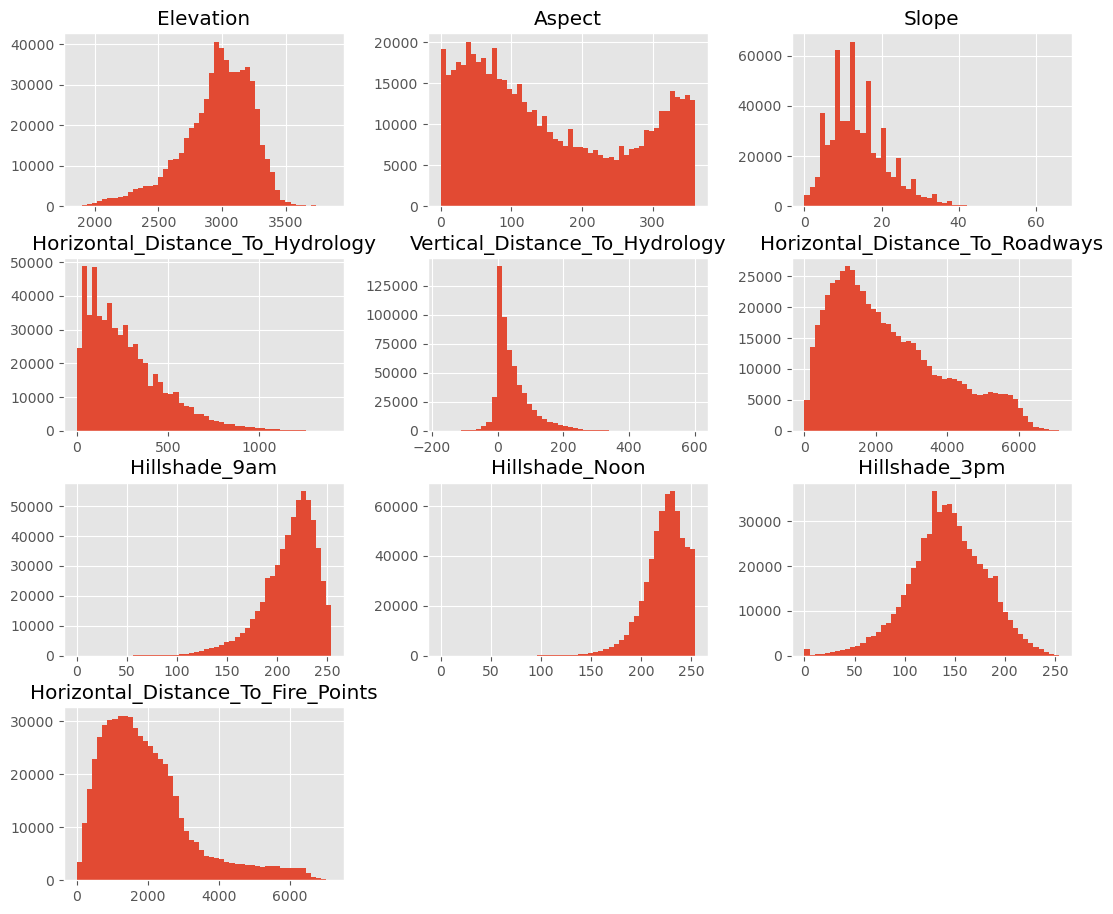

In [222]:
#Take some column
col = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
train = trees[col]
#histogram
train.hist(bins=50,figsize=(13,11))
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/histo.png'
plt.savefig(save_path)
plt.show()

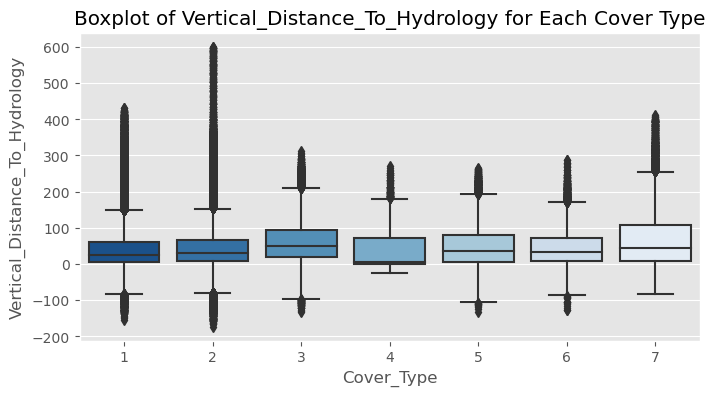

In [223]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=trees, x="Cover_Type", y="Vertical_Distance_To_Hydrology", palette="Blues_r")
plt.title("Boxplot of Vertical_Distance_To_Hydrology for Each Cover Type")
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/hydro_box.png'
plt.savefig(save_path)
plt.show()


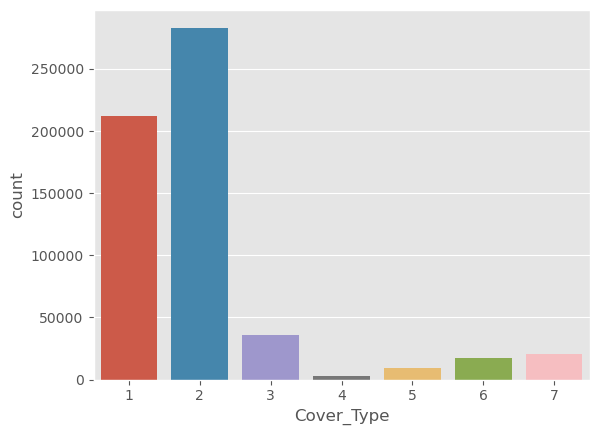

In [224]:
#number of samples in each class
sns.countplot(x='Cover_Type', data=trees)

save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/bar.png'
plt.savefig(save_path)

In [9]:
# Outlier detection
def find_outlier_IQR(df, col_name):
    
    Q1=np.percentile(np.array(df[col_name].tolist()), 25)
    Q3=np.percentile(np.array(df[col_name].tolist()), 75)
    IQR=Q3-Q1
    UL= Q3 + (3*IQR)
    LL= Q1 - (3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < LL) | (value > UL):
            outlier_count +=1

    return LL, UL, outlier_count


for column in trees[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']]:
    a,b,c =find_outlier_IQR(trees, column)
    if c > 0:
        print(" {} outliers in {}. Normal range is {} - {}. ".format(c, column, a, b))

 275 outliers in Slope. Normal range is -18.0 - 45.0. 
 414 outliers in Horizontal_Distance_To_Hydrology. Normal range is -720.0 - 1212.0. 
 5339 outliers in Vertical_Distance_To_Hydrology. Normal range is -179.0 - 255.0. 
 10 outliers in Horizontal_Distance_To_Fire_Points. Normal range is -3554.0 - 7128.0. 


In [11]:
# Removing outliers
trees = trees[(trees['Horizontal_Distance_To_Hydrology'] > find_outlier_IQR(trees, 'Horizontal_Distance_To_Hydrology')[0]) & 
                (trees['Horizontal_Distance_To_Hydrology'] < find_outlier_IQR(trees, 'Horizontal_Distance_To_Hydrology')[1])&
                (trees['Vertical_Distance_To_Hydrology'] > find_outlier_IQR(trees, 'Vertical_Distance_To_Hydrology')[0]) & 
                (trees['Vertical_Distance_To_Hydrology'] < find_outlier_IQR(trees, 'Vertical_Distance_To_Hydrology')[1])]
print(trees.shape)

(575348, 55)


In [13]:
for column in trees[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']]:
    a,b,c =find_outlier_IQR(trees, column)
    if c > 0:
        print(" {} outliers in {}. Normal range is {} - {}. ".format(c, column, a, b))

 66 outliers in Horizontal_Distance_To_Hydrology. Normal range is -705.0 - 1192.0. 
 693 outliers in Vertical_Distance_To_Hydrology. Normal range is -173.0 - 247.0. 
 5 outliers in Horizontal_Distance_To_Fire_Points. Normal range is -3568.0 - 7142.0. 


In [14]:
# Splitting Cont. and Discrete var.
cont_vars = trees.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
cont_vars_vis = cont_vars.copy()
cont_vars_vis['Cover_Type'] = trees['Cover_Type'] 

soiltype = trees.loc[:,'Soil_Type1':'Soil_Type40']
soiltype_vis = soiltype.copy()
soiltype_vis['Cover_Type'] = trees['Cover_Type'] 

wilderness = trees.loc[:,'Wilderness_Area1':'Wilderness_Area4']
wilderness_vis = wilderness.copy()
wilderness_vis['Cover_Type'] = trees['Cover_Type'] 

print(cont_vars.shape)
print(soiltype.shape)
print(wilderness.shape)

(575348, 10)
(575348, 40)
(575348, 4)


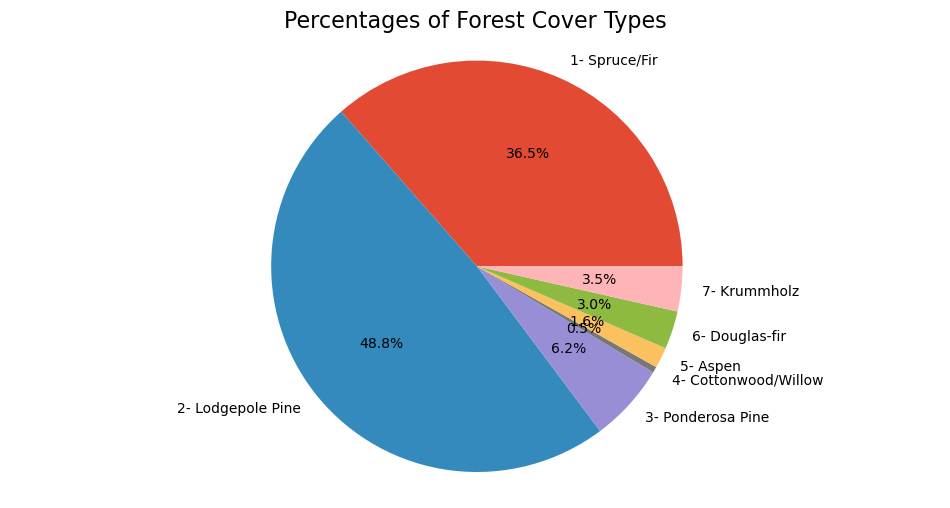

In [226]:
labels= '1- Spruce/Fir', '2- Lodgepole Pine', '3- Ponderosa Pine', '4- Cottonwood/Willow', '5- Aspen', '6- Douglas-fir', '7- Krummholz'

trees_dist = trees.groupby('Cover_Type').size()
fig1, ax1 = plt.subplots()
fig1.set_size_inches(12,6)
ax1.pie(trees_dist, labels=labels, autopct='%0.1f%%')
ax1.axis('equal')
plt.title('Percentages of Forest Cover Types',fontsize=16)

save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/pie.png'
plt.savefig(save_path)
plt.show()

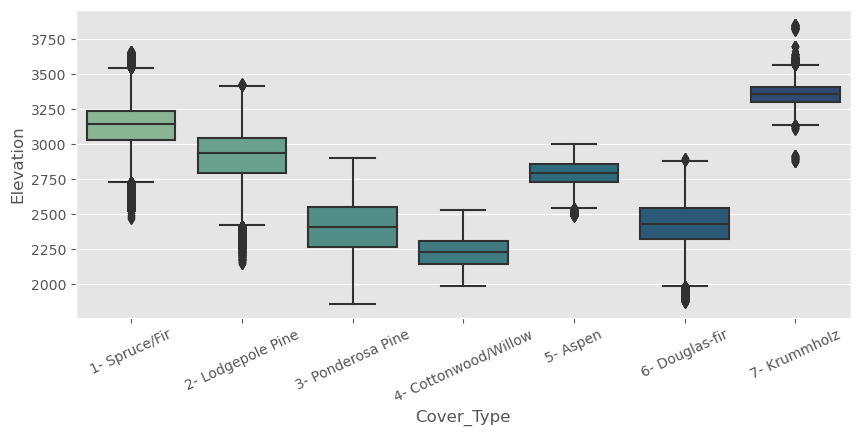

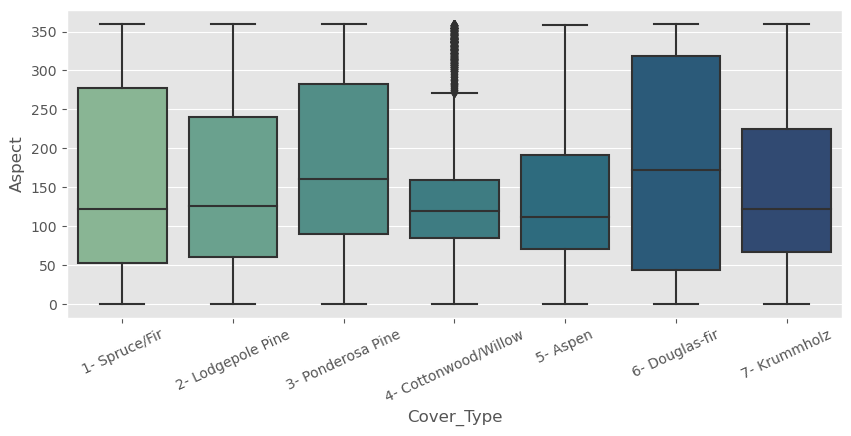

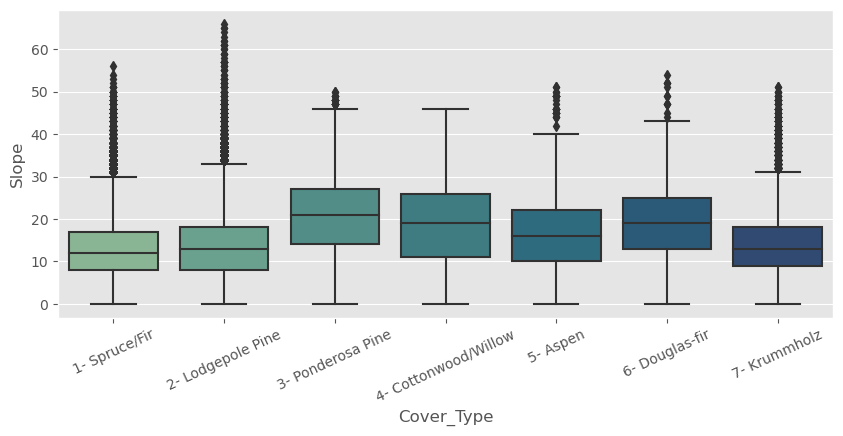

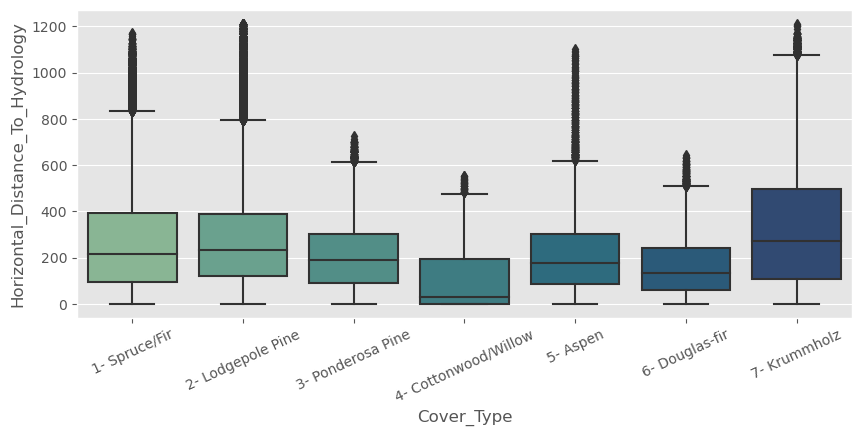

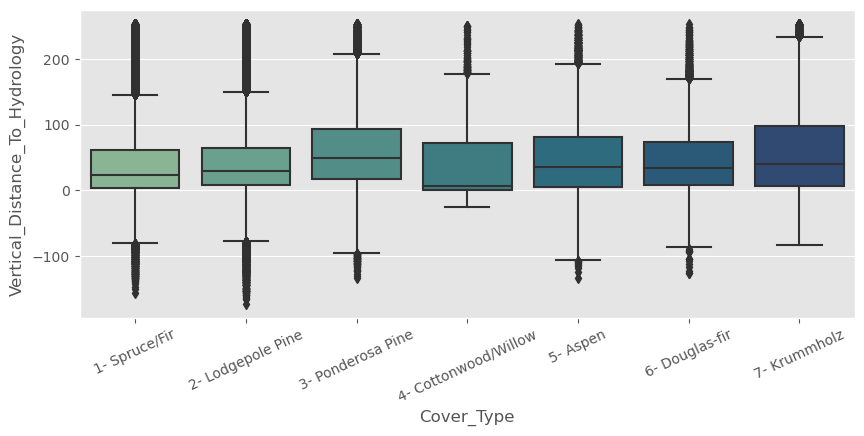

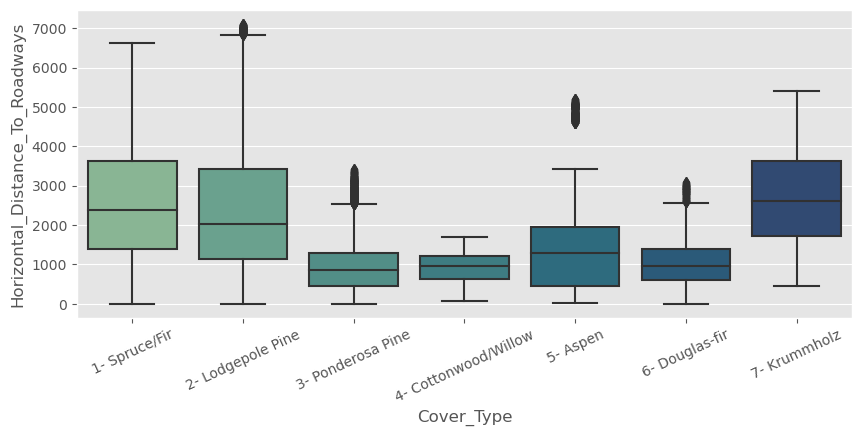

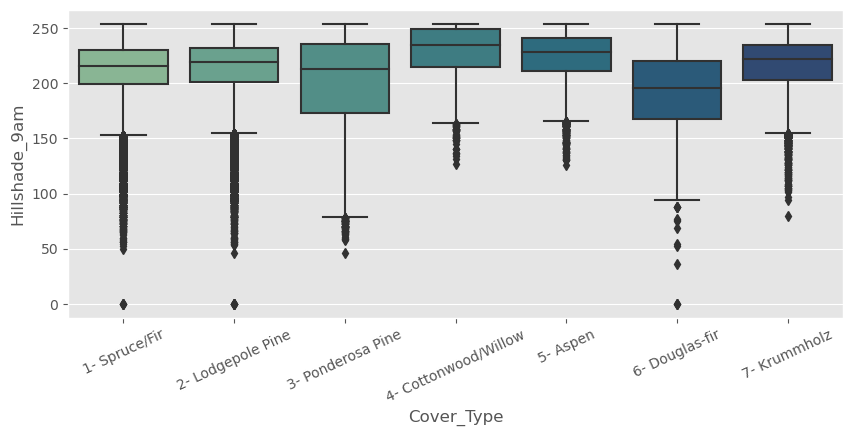

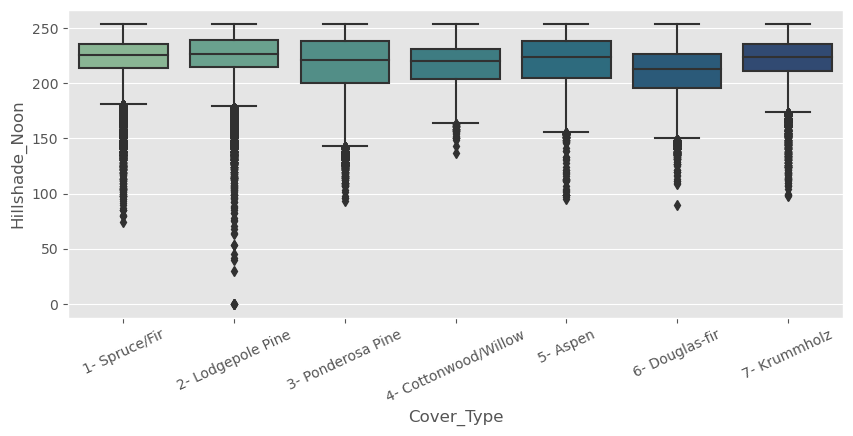

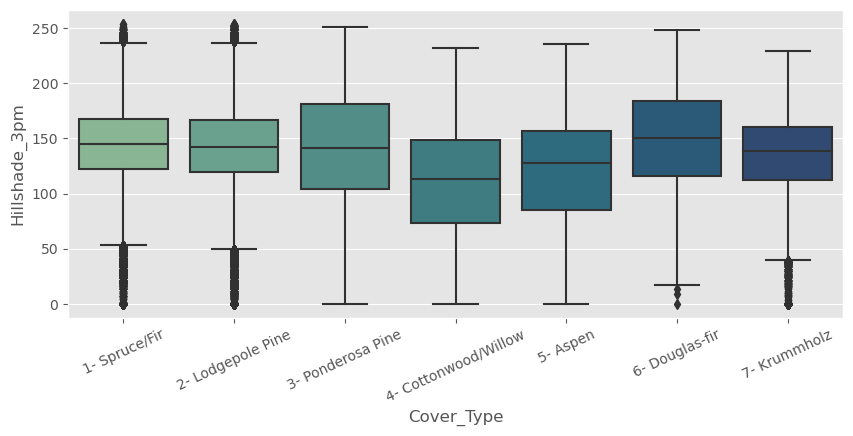

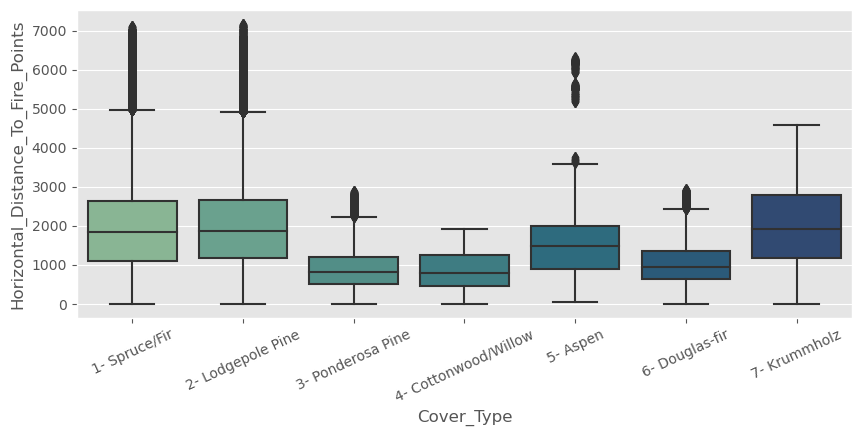

In [227]:
for i, col in enumerate(cont_vars.columns):
    plt.figure(i,figsize=(10,4))
    ax = sns.boxplot(x=cont_vars_vis['Cover_Type'], y=col, data=cont_vars_vis, palette="crest")
    ax.set_xticklabels(labels, rotation=25)
    plt.show()

In [231]:
Wilderness_data=trees.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=trees.loc[:,'Soil_Type1':'Soil_Type40']

In [230]:
def rev_code(row):
    for c in Soil_data.columns:
        if row[c]==1:
            return c  

trees['Soil_Type']=Soil_data.apply(rev_code, axis=1)



In [233]:
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

trees['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Wilderness_Area1'),
  Text(1, 0, 'Wilderness_Area3'),
  Text(2, 0, 'Wilderness_Area4'),
  Text(3, 0, 'Wilderness_Area2')])

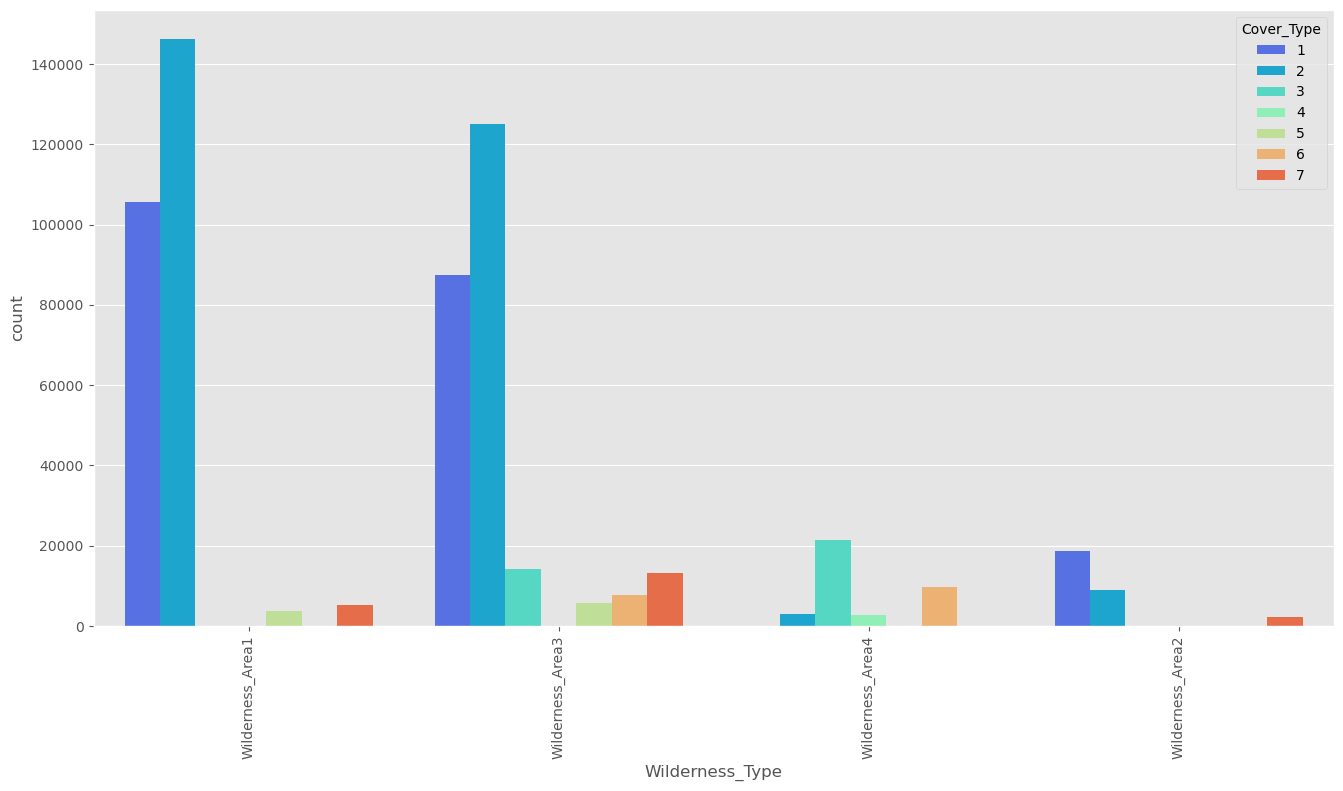

In [237]:
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=trees, palette="rainbow")
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/count_wa.png'
plt.savefig(save_path)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Soil_Type29'),
  Text(1, 0, 'Soil_Type12'),
  Text(2, 0, 'Soil_Type30'),
  Text(3, 0, 'Soil_Type18'),
  Text(4, 0, 'Soil_Type16'),
  Text(5, 0, 'Soil_Type20'),
  Text(6, 0, 'Soil_Type24'),
  Text(7, 0, 'Soil_Type23'),
  Text(8, 0, 'Soil_Type40'),
  Text(9, 0, 'Soil_Type19'),
  Text(10, 0, 'Soil_Type8'),
  Text(11, 0, 'Soil_Type22'),
  Text(12, 0, 'Soil_Type39'),
  Text(13, 0, 'Soil_Type9'),
  Text(14, 0, 'Soil_Type38'),
  Text(15, 0, 'Soil_Type33'),
  Text(16, 0, 'Soil_Type31'),
  Text(17, 0, 'Soil_Type32'),
  Text(18, 0, 'Soil_Type11'),
  Text(19, 0, 'Soil_Type10'),
  Text(20, 0, 'Soil_Type5'),
  Text(21, 0, 'Soil_Type28'),
  Text(22, 0, 'Soil_Type4'),
  Text(23, 0, 'Soil_Type1'),
  Text(24, 0, 'Soil_Type13'),
  Text(25, 0, 'Soil_Type2'),
  Text(26, 0, 'Soil_Type17'),
  Text(27, 0, 'Soil_

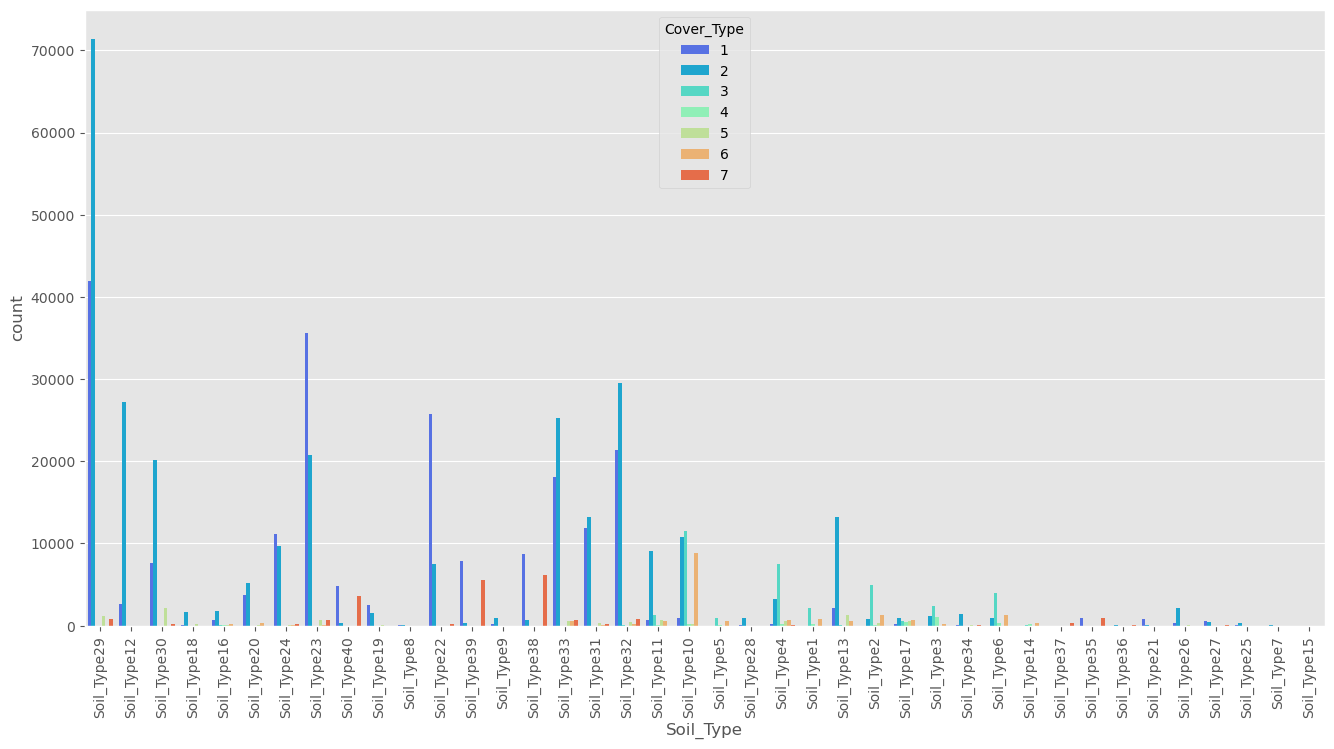

In [238]:
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=trees, palette="rainbow")
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/count_sa.png'
plt.savefig(save_path)
plt.xticks(rotation=90)

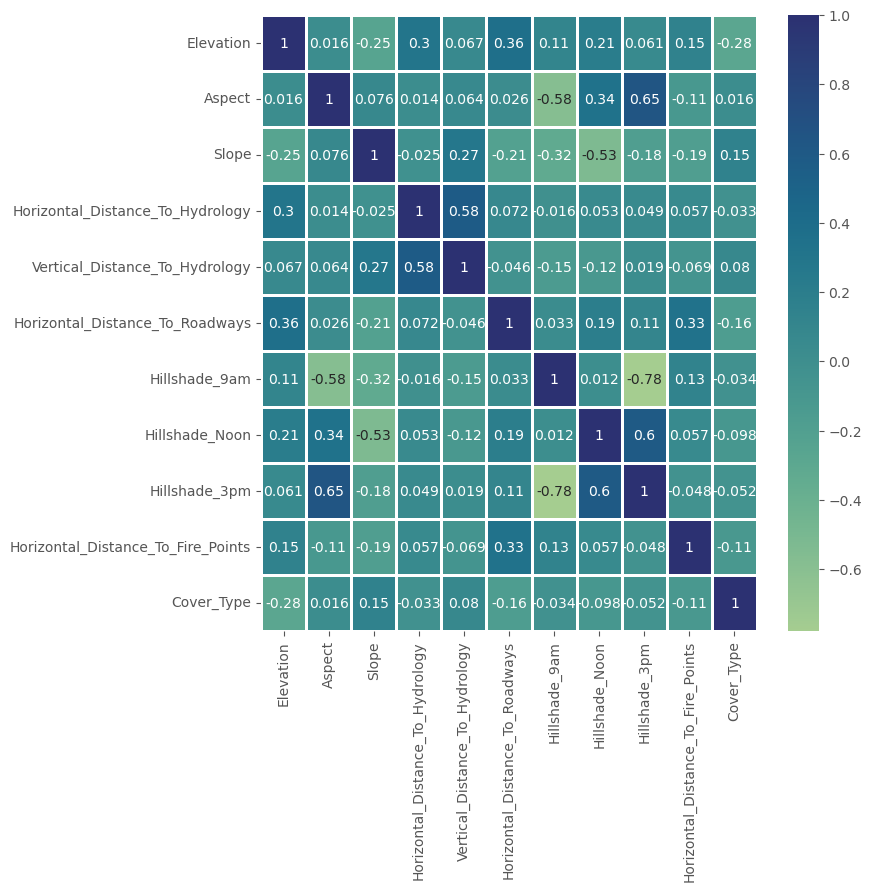

In [245]:
# Corr. of Cont. var. 
plt.figure(figsize=(8,8))

sns.heatmap(cont_vars_vis.corr(),cmap='crest',linecolor='white',linewidths=1,annot=True, xticklabels = True, yticklabels= True)
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/corr_cont.png'
plt.savefig(save_path)

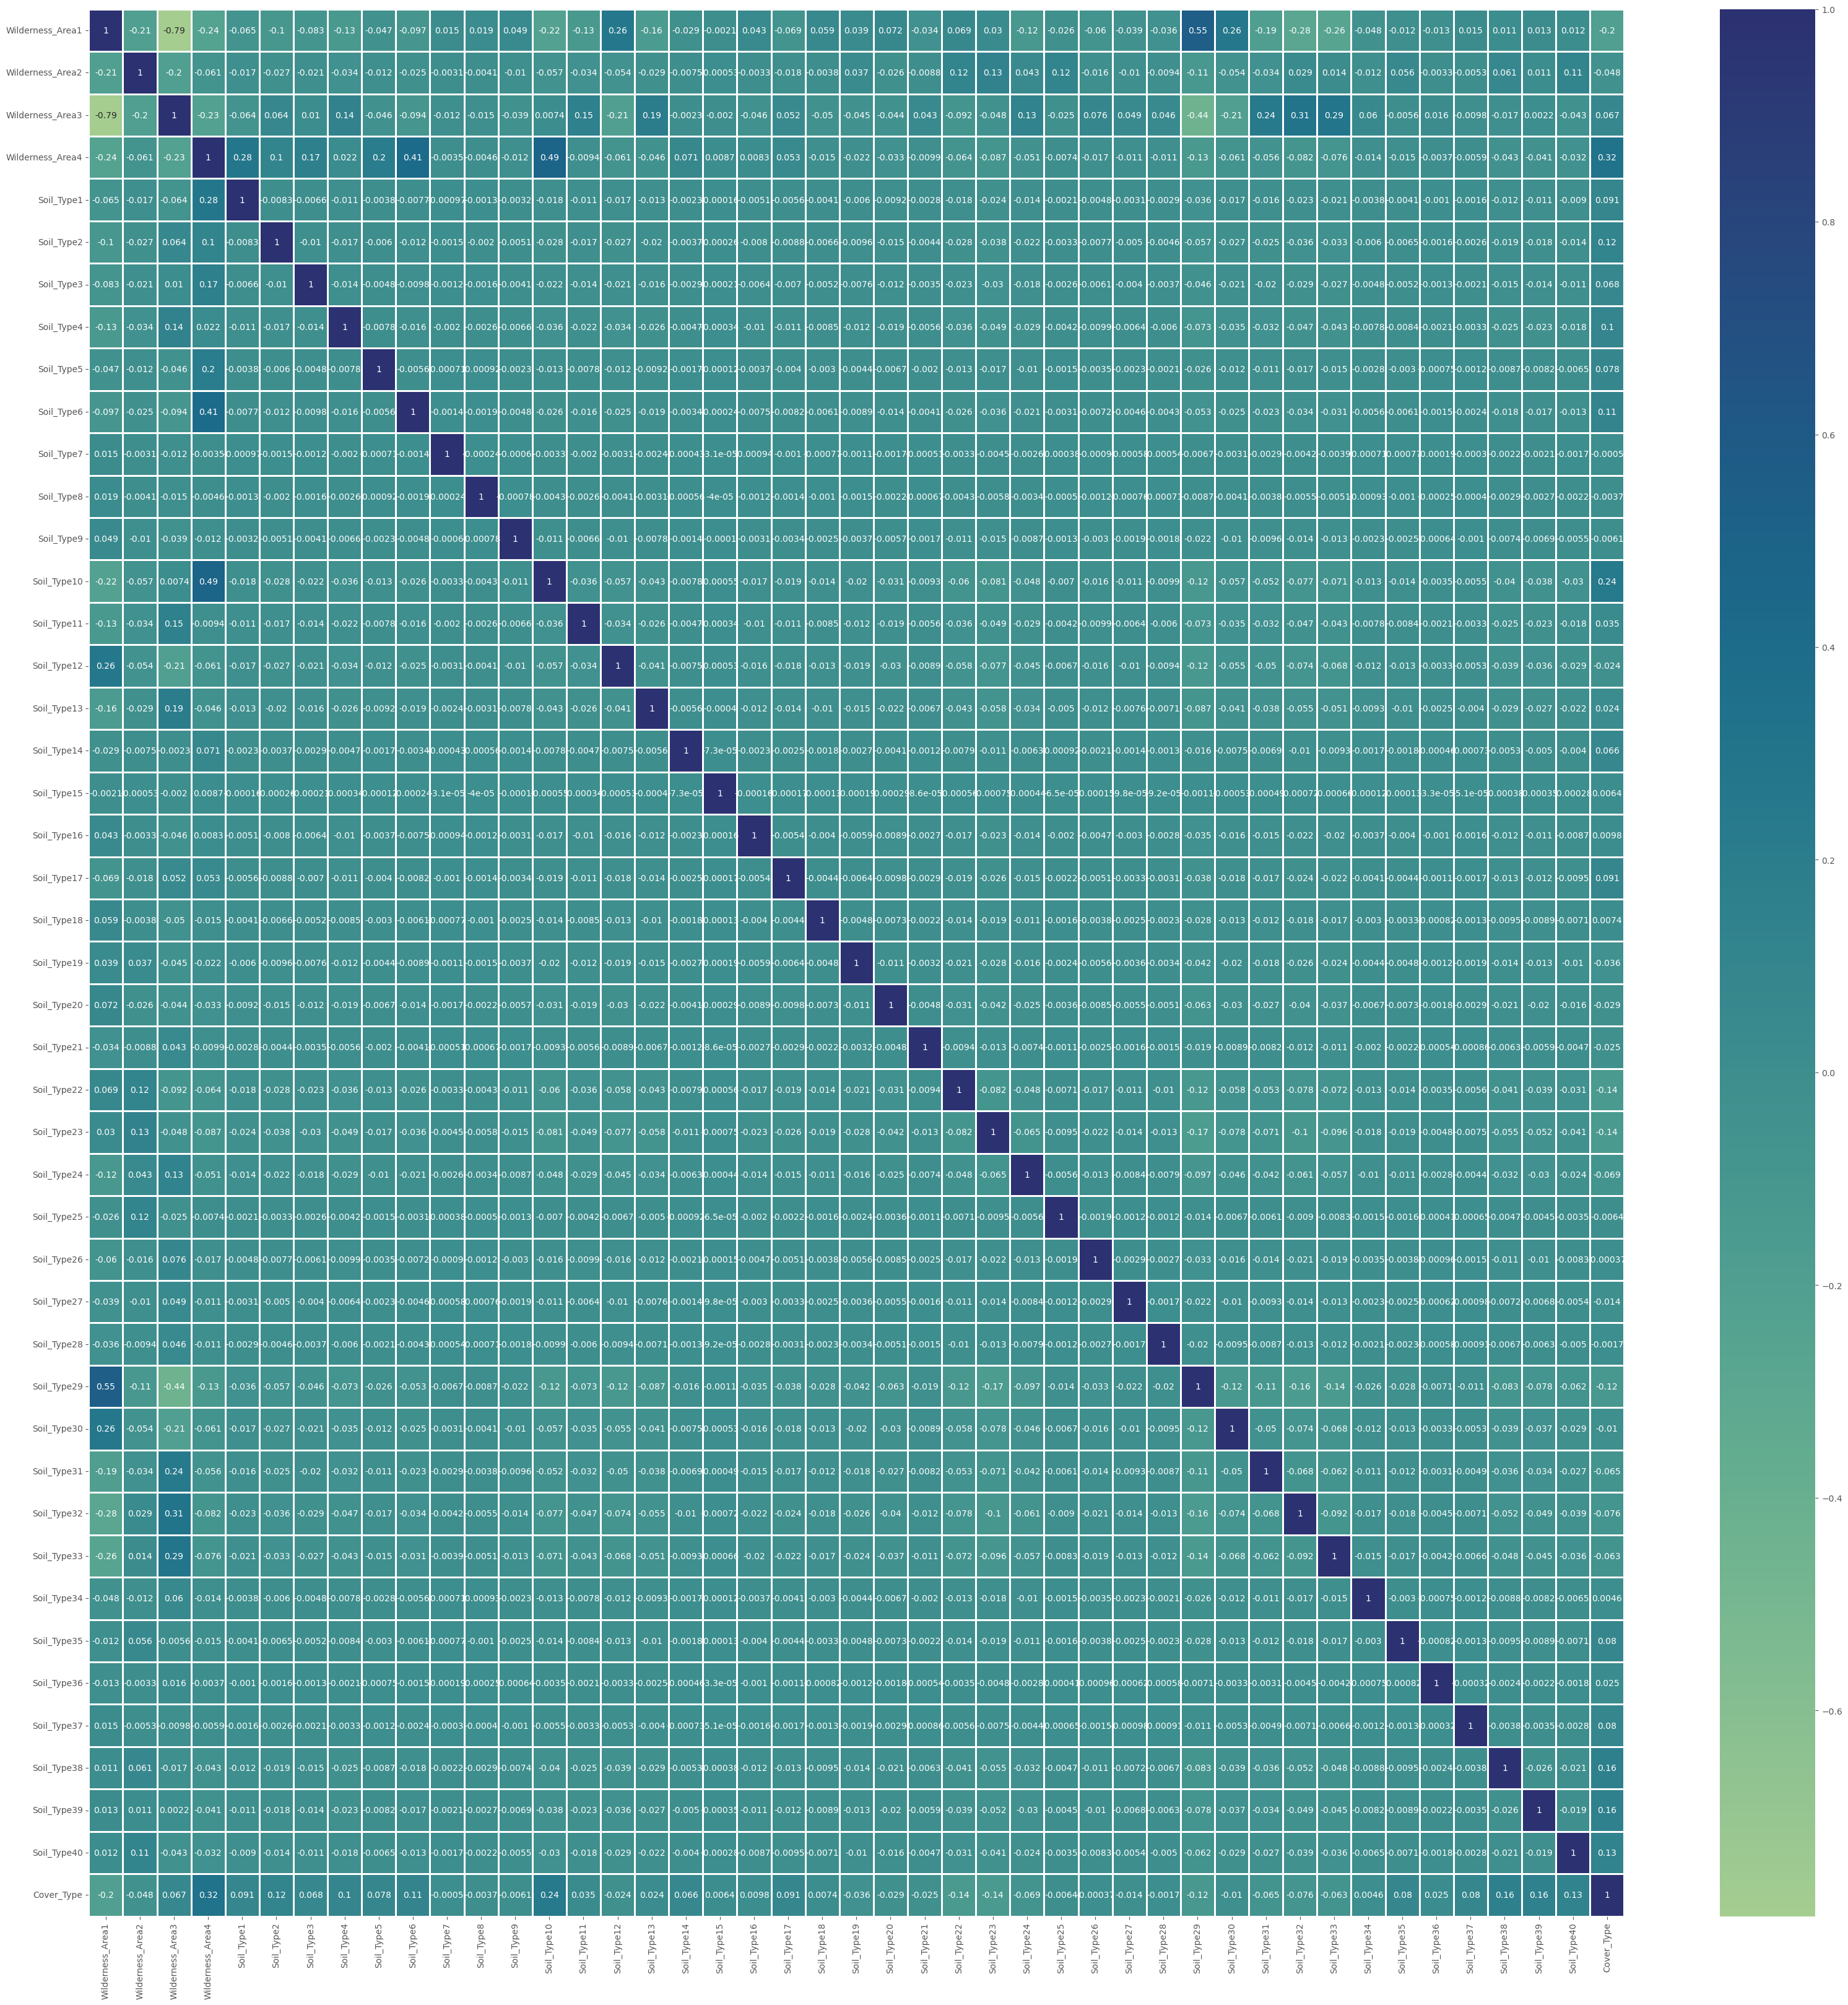

In [247]:
# Corr. of Discrete. var. 
plt.figure(figsize=(40,40))
disc = trees.drop(trees.columns[0:10], axis=1)
sns.heatmap(disc.corr(),cmap='crest',linecolor='white',linewidths=1,annot=True, xticklabels = True, yticklabels= True)
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/corr_disc.png'
plt.savefig(save_path)


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.94      0.94     63547
           2       0.95      0.95      0.95     84955
           3       0.93      0.93      0.93     10771
           4       0.83      0.84      0.83       808
           5       0.82      0.81      0.82      2825
           6       0.87      0.87      0.87      5239
           7       0.94      0.94      0.94      6159

    accuracy                           0.94    174304
   macro avg       0.90      0.90      0.90    174304
weighted avg       0.94      0.94      0.94    174304



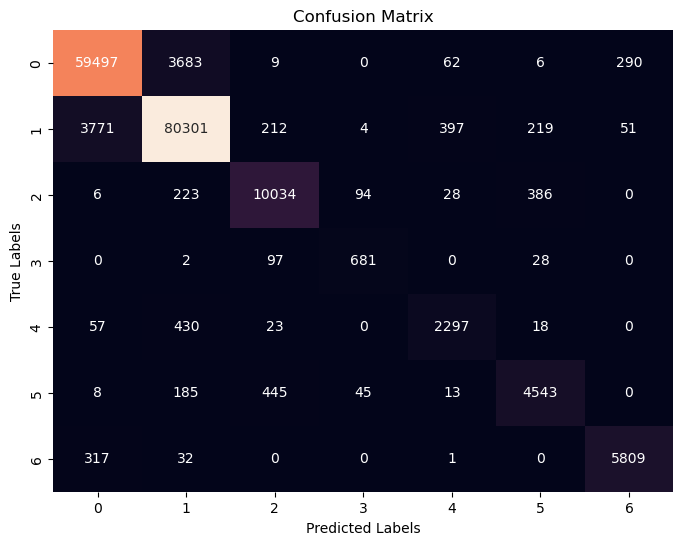

In [154]:
# Decision tree
from sklearn.metrics import accuracy_score, classification_report

# Define the features (X) and target variable (y)
X = trees.drop('Cover_Type', axis=1) 
y = trees['Cover_Type']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [155]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, and FN
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 80301
True Negatives (TN): 59497
False Positives (FP): 3683
False Negatives (FN): 3771


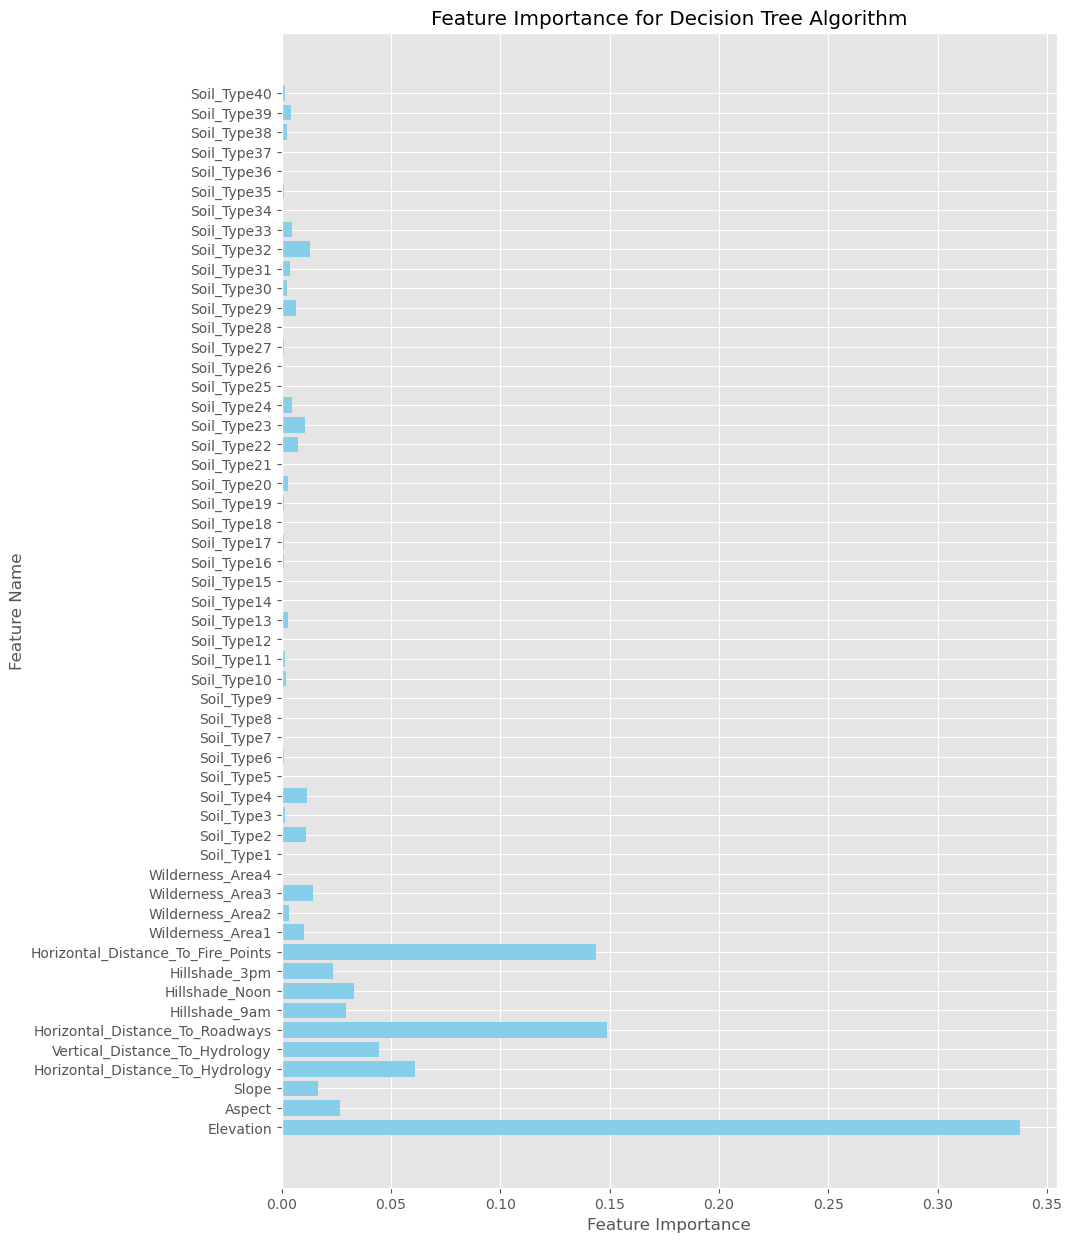

In [250]:
#  feature importances 
feat_importances = dt_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 15))
plt.barh(feature_names, feat_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance for Decision Tree Algorithm')
save_path = 'F:/Sem 3/535 Data Mining/FC EDA/out/feat.png'
plt.savefig(save_path)
plt.show()


Accuracy: 0.46
Classification Report:
                      precision    recall  f1-score   support

       1- Spruce/Fir       0.50      0.77      0.61     62680
   2- Lodgepole Pine       0.84      0.17      0.28     84404
   3- Ponderosa Pine       0.45      0.80      0.58     10836
4- Cottonwood/Willow       0.21      0.86      0.34       792
            5- Aspen       0.08      0.63      0.15      2784
      6- Douglas-fir       0.37      0.08      0.14      5148
        7- Krummholz       0.36      0.84      0.50      5961

            accuracy                           0.46    172605
           macro avg       0.40      0.59      0.37    172605
        weighted avg       0.65      0.46      0.42    172605



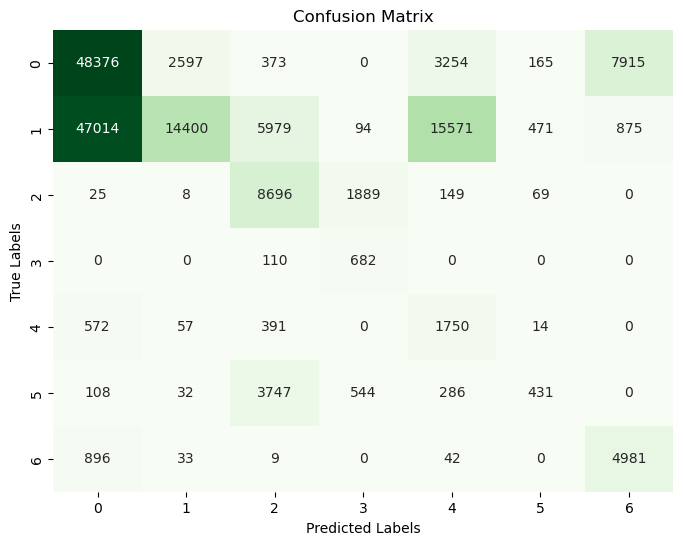

In [119]:
# Naive Bayes
# Define the features (X) and target variable (y)
X = trees.drop('Cover_Type', axis=1)  
y = trees['Cover_Type']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the Naive Bayes classifier 
nb_classifier = GaussianNB()

# Train the classifier on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, and FN
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 14400
True Negatives (TN): 48376
False Positives (FP): 2597
False Negatives (FN): 47014


Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     63547
           2       0.95      0.97      0.96     84955
           3       0.94      0.96      0.95     10771
           4       0.91      0.87      0.89       808
           5       0.94      0.76      0.84      2825
           6       0.94      0.89      0.91      5239
           7       0.97      0.95      0.96      6159

    accuracy                           0.95    174304
   macro avg       0.94      0.91      0.92    174304
weighted avg       0.95      0.95      0.95    174304



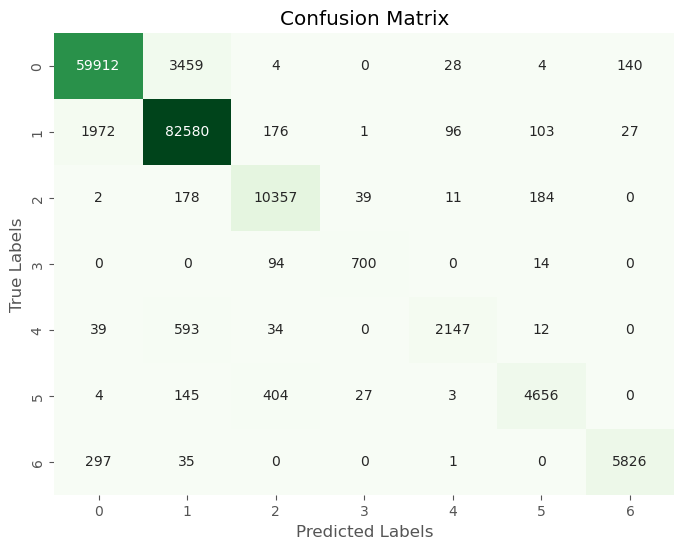

In [220]:
# Random Forest
# Define the features (X) and target variable (y)
X = trees.drop('Cover_Type', axis=1) 
y = trees['Cover_Type']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [7]:
# KNN Classifier

# Define the features (X) and target variable (y)
X = trees.drop('Cover_Type', axis=1) 
y = trees['Cover_Type']  

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the KNN classifier (you can choose the number of neighbors, e.g., n_neighbors=3)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.97
Classification Report:


NameError: name 'classification_report' is not defined

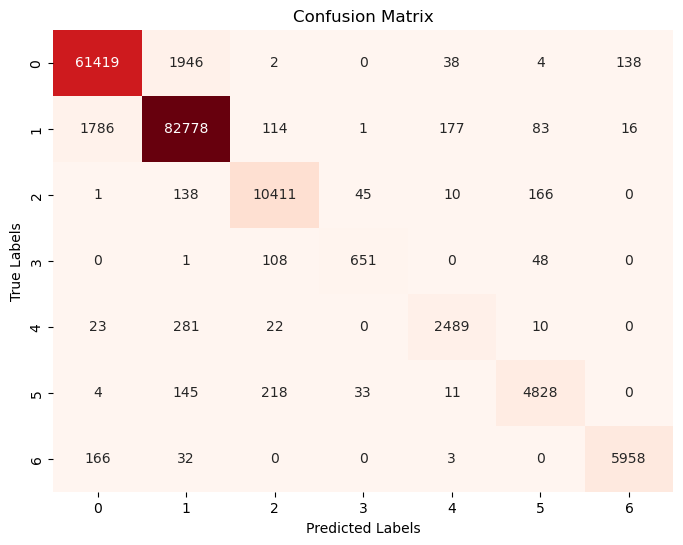

In [9]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Display classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, and FN
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     63547
           2       0.97      0.97      0.97     84955
           3       0.96      0.97      0.96     10771
           4       0.89      0.81      0.85       808
           5       0.91      0.88      0.90      2825
           6       0.94      0.92      0.93      5239
           7       0.97      0.97      0.97      6159

    accuracy                           0.97    174304
   macro avg       0.94      0.93      0.94    174304
weighted avg       0.97      0.97      0.97    174304

True Positives (TP): 82778
True Negatives (TN): 61419
False Positives (FP): 1946
False Negatives (FN): 1786


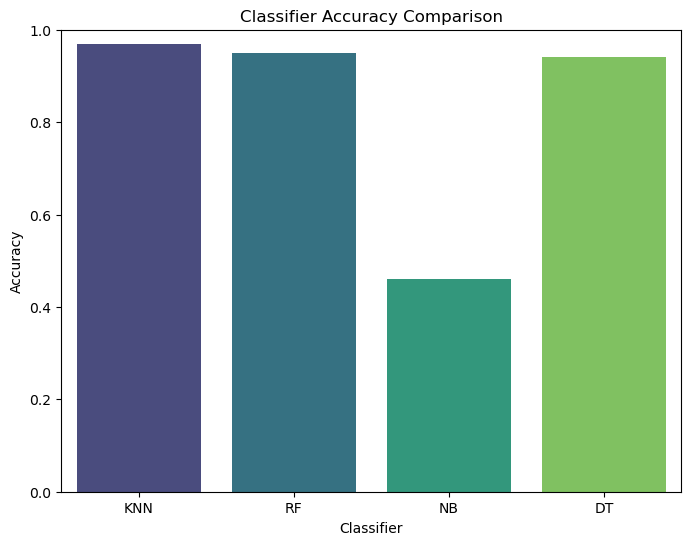

In [20]:
classifiers = ['KNN', 'RF', 'NB', 'DT']
accuracy_scores = [0.97, 0.95, 0.46, 0.94]
data = pd.DataFrame({'Classifier': classifiers, 'Accuracy': accuracy_scores})
plt.figure(figsize=(8, 6))
sns.barplot(x='Classifier', y='Accuracy', data=data, palette='viridis')
plt.ylim(0, 1)  
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()